In [34]:
import numpy as np #for matricecs
import pandas as pd #for reading the data
from matplotlib import pyplot as plt #for showing images

In [35]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [36]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [38]:
Y_train
X_train[:, 0].shape #784 pixels in it

(784,)

In [39]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
    
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [40]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [49]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1, 500)

Iteration:  0
[4 6 6 ... 4 9 4] [9 3 9 ... 3 5 3]
0.07558536585365853
Iteration:  10
[4 3 3 ... 3 3 3] [9 3 9 ... 3 5 3]
0.5116585365853659
Iteration:  20
[4 3 3 ... 3 3 3] [9 3 9 ... 3 5 3]
0.4616585365853659
Iteration:  30
[2 3 3 ... 3 3 3] [9 3 9 ... 3 5 3]
0.6110243902439024
Iteration:  40
[4 8 8 ... 3 3 3] [9 3 9 ... 3 5 3]
0.7028536585365853
Iteration:  50
[4 3 3 ... 3 3 3] [9 3 9 ... 3 5 3]
0.6433170731707317
Iteration:  60
[9 3 9 ... 3 3 3] [9 3 9 ... 3 5 3]
0.6510487804878049
Iteration:  70
[4 3 3 ... 3 5 3] [9 3 9 ... 3 5 3]
0.7113414634146341
Iteration:  80
[4 3 9 ... 3 3 3] [9 3 9 ... 3 5 3]
0.795829268292683
Iteration:  90
[9 3 9 ... 3 5 3] [9 3 9 ... 3 5 3]
0.845609756097561
Iteration:  100
[9 5 9 ... 3 5 3] [9 3 9 ... 3 5 3]
0.8450243902439024
Iteration:  110
[9 5 9 ... 3 5 3] [9 3 9 ... 3 5 3]
0.8330487804878048
Iteration:  120
[9 3 9 ... 3 5 3] [9 3 9 ... 3 5 3]
0.8461219512195122
Iteration:  130
[9 3 9 ... 3 5 3] [9 3 9 ... 3 5 3]
0.8661951219512195
Iteration:  140
[9

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


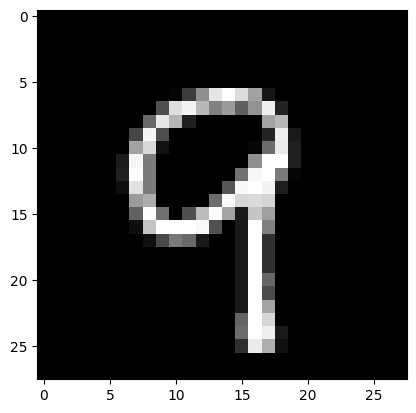

Prediction:  [3]
Label:  3


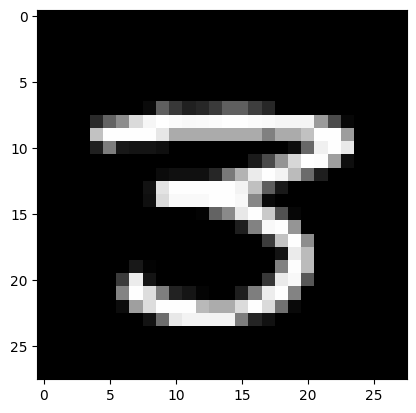

Prediction:  [9]
Label:  9


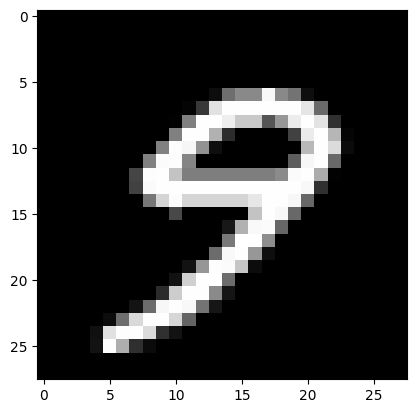

Prediction:  [2]
Label:  2


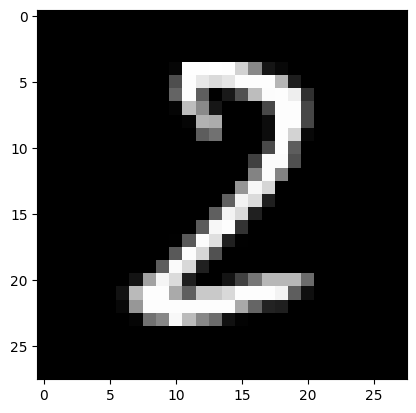

In [51]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [52]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 9 3 8 4 2 0 4 8 6 3 6 9 2 4 2 6 1 9 1 6 9 8 3 0 6 7 2 3 7 8 2 9 6 5 4 3
 9 4 2 1 2 7 2 3 6 4 6 3 7 1 4 8 3 2 6 9 2 8 6 7 1 9 1 6 1 2 7 3 4 9 1 2 8
 2 5 3 2 7 8 3 4 7 2 9 0 3 4 8 1 2 0 1 0 1 0 2 4 7 5 4 6 4 6 9 3 0 1 8 6 6
 4 2 1 4 7 1 3 6 0 0 6 2 4 9 9 5 8 6 5 9 1 7 8 9 7 2 0 2 1 3 8 3 9 1 2 4 1
 1 5 7 8 8 2 2 3 0 5 6 0 6 3 5 1 8 0 5 2 9 4 7 6 4 1 8 9 8 7 0 6 1 2 7 2 3
 3 7 5 9 1 1 3 6 8 8 1 9 9 3 4 0 5 9 8 5 9 6 9 3 7 1 3 6 4 3 1 6 4 4 0 6 7
 3 1 1 4 3 0 6 4 6 8 9 6 0 0 8 1 8 1 0 1 4 7 8 1 8 0 0 8 8 4 5 1 1 7 0 6 6
 7 3 4 4 3 2 8 3 9 1 6 6 9 6 8 7 0 8 8 0 4 2 9 6 0 7 9 7 4 0 7 8 0 2 2 9 1
 8 1 9 6 6 6 3 3 7 6 8 9 6 2 4 9 9 8 3 4 4 9 7 4 0 2 4 1 1 3 9 1 1 5 1 3 9
 1 2 7 1 5 4 4 6 3 3 1 9 8 0 6 1 8 1 9 1 1 4 1 8 4 0 6 6 0 1 9 9 3 6 3 0 1
 2 3 7 9 7 2 7 2 0 7 9 2 2 7 4 4 2 2 9 8 6 3 1 4 5 1 8 7 7 1 7 7 4 8 2 4 4
 9 5 4 5 1 3 8 8 7 7 2 9 2 8 9 7 5 3 6 7 7 3 3 9 2 9 8 9 6 9 7 8 3 8 3 1 3
 4 3 0 2 8 5 9 0 9 4 6 6 0 8 0 3 8 5 9 1 6 8 6 9 2 8 4 7 7 7 3 6 5 6 9 1 3
 5 7 0 7 8 8 7 3 1 9 0 8 

0.89